# Big Data (UBA) -  2024

## Trabajo Práctico 4 

### Grupo 2
- Jimena Teran 
- Juan Lynch
- Renzo Falciglia

### Parte I: Analizando la base

#### Ejercicio 2
En este ejercicio se cargan los archivos y se unen a la base del TP3.

In [1]:
#Ejercicio 2

#Importamos los paquetes necesarios y cargamos el archivo del 1T de 2004

import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np
import pyarrow


#Cargamos la base de hogares de 2004
archivo_dta = "EPH_1T2004/Hogar_t104.dta"
df_2004 = pd.read_stata(archivo_dta)
print(df_2004.head())

#Cargamos la base de hogares de 2024
archivo_txt = "EPH_1T2024/usu_hogar_t124.txt"
df_2024 = pd.read_csv(archivo_txt,  sep=";")
print(df_2024.head())


     CODUSU  nro_hogar realizada    ano4       trimestre    region mas_500  \
0  125051          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
1  125082          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
2  125181          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
3  125283          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
4  126192          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   

      aglomerado  pondera   iv1  ... gdeccfr pdeccfr adeccfr vii1_1 vii1_2  \
0  Gran La Plata    355.0  Casa  ...      01              01    1.0    0.0   
1  Gran La Plata    306.0  Casa  ...      03              02    2.0    0.0   
2  Gran La Plata    541.0  Casa  ...      09              09    2.0    0.0   
3  Gran La Plata    255.0  Casa  ...      07              07    1.0    2.0   
4  Gran La Plata    218.0  Casa  ...      08              08    2.0    0.0   

                                 vii2_1 vii2_2 vii2_3 vii2_4 i

In [2]:
#Cambio los nombres
df_2004.columns = df_2004.columns.str.upper()
print(df_2004.columns)
print(df_2024.columns)

Index(['CODUSU', 'NRO_HOGAR', 'REALIZADA', 'ANO4', 'TRIMESTRE', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3',
       'VII2_4', 'IDIMPH'],
      dtype='object')
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA',

In [3]:
#Filtro los aglomerados que no corresponden a CABA o a partidos del Gran Buenos Aires

df_2004 = df_2004[df_2004["AGLOMERADO"].isin(["Ciudad de Buenos Aires", "Partidos del GBA"])]
df_2024 = df_2024[df_2024["AGLOMERADO"].isin([32, 33])]

In [4]:
#Filtro por las variables de interés para predecir el desempleo

variables_filtrar = ["CODUSU", "NRO_HOGAR", "AGLOMERADO", "ITF", "IPCF", "DECIFR", "DECCFR", "IV1", "II1", "II2", "V5", "IX_TOT", "IV12_3",
                     "II4_3", "II9", "V1"]

#Filtramos en la base de 2004
df_2004 = df_2004[variables_filtrar]

#Filtramos en la base de 2024
df_2024 = df_2024[variables_filtrar]

In [5]:
#Unimos verticalmente y verificamos los resultados
df_hogar = pd.concat([df_2004, df_2024], ignore_index=True)

print(df_hogar.head())

     CODUSU  NRO_HOGAR              AGLOMERADO     ITF   IPCF DECIFR DECCFR  \
0  125098          1.0  Ciudad de Buenos Aires   368.0  368.0     02     07   
1  125397          1.0  Ciudad de Buenos Aires     0.0    0.0     00     00   
2  125515          1.0  Ciudad de Buenos Aires   440.0  440.0     03     07   
3  125558          1.0  Ciudad de Buenos Aires  2130.0  532.5     09     08   
4  125599          1.0  Ciudad de Buenos Aires  1040.0  208.0     07     04   

            IV1  II1  II2  V5  IX_TOT IV12_3 II4_3  \
0  Departamento  3.0  1.0  No     1.0     No    No   
1  Departamento  2.0  1.0  No     1.0     No    No   
2  Departamento  2.0  1.0  No     1.0     No    No   
3  Departamento  4.0  3.0  No     4.0     No    No   
4          Casa  4.0  3.0  No     5.0     No    Sí   

                                                 II9  V1  
0  Compartido con otro/s hogar/es de la misma viv...  No  
1                            Uso exclusivo del hogar  Sí  
2                      

In [6]:
#Cargamos la bbdd del TP3, que la generé con el script "TP4_UBA_bbdd_TP3.ipynb"

df_individual = pd.read_parquet('datos.individual')
print(df_individual)

       AGLOMERADO                         CODUSU  NRO_HOGAR  CH04  CH06  CH07  \
0            32.0                         125098        1.0   1.0  79.0   4.0   
1            32.0                         125397        1.0   2.0  67.0   3.0   
2            32.0                         125515        1.0   2.0  74.0   4.0   
3            32.0                         125558        1.0   1.0  54.0   2.0   
4            32.0                         125558        1.0   2.0  51.0   2.0   
...           ...                            ...        ...   ...   ...   ...   
13565        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   2.0  43.0   3.0   
13566        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   1.0  21.0   5.0   
13567        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   1.0  20.0   5.0   
13568        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   1.0  11.0   5.0   
13569        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   2.0  24.0   5.0   

       CH08  NIVEL_ED  ESTA

In [7]:
#Transformo las variables para poder hacer el merge

# Asegurarse de que las columnas no tengan valores NaN o no numéricos
df_individual['NRO_HOGAR'] = pd.to_numeric(df_individual['NRO_HOGAR'], errors='coerce')
df_hogar['NRO_HOGAR'] = pd.to_numeric(df_hogar['NRO_HOGAR'], errors='coerce')

# Manejar valores NaN antes de convertir a int64
df_individual['NRO_HOGAR'].fillna(0, inplace=True)  # Reemplazar NaN con 0, o usa otro valor según convenga
df_hogar['NRO_HOGAR'].fillna(0, inplace=True)

# Convertir a int64
df_individual['NRO_HOGAR'] = df_individual['NRO_HOGAR'].astype('int64')
df_hogar['NRO_HOGAR'] = df_hogar['NRO_HOGAR'].astype('int64')

# Confirmar el tipo de datos
print(df_individual['NRO_HOGAR'].dtype)  
print(df_hogar['NRO_HOGAR'].dtype)        


int64
int64


C:\Users\renzo\AppData\Local\Temp\ipykernel_1488\1976463751.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_individual['NRO_HOGAR'].fillna(0, inplace=True)  # Reemplazar NaN con 0, o usa otro valor según convenga
C:\Users\renzo\AppData\Local\Temp\ipykernel_1488\1976463751.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [8]:
#Veo los formatos para poder hacer el merge

print(df_individual['CODUSU'].dtype)
print(df_hogar['CODUSU'].dtype)

print(df_individual['NRO_HOGAR'].dtype)
print(df_hogar['NRO_HOGAR'].dtype)

object
object
int64
int64


In [9]:
# Quitar espacios en blanco de CODUSU (si hay)
df_individual['CODUSU'] = df_individual['CODUSU'].str.strip()
df_hogar['CODUSU'] = df_hogar['CODUSU'].str.strip()

# Asegurar consistencia en tipos (reconvertir por seguridad)
df_individual['CODUSU'] = df_individual['CODUSU'].astype(str)
df_hogar['CODUSU'] = df_hogar['CODUSU'].astype(str)

df_individual['NRO_HOGAR'] = df_individual['NRO_HOGAR'].astype(int)
df_hogar['NRO_HOGAR'] = df_hogar['NRO_HOGAR'].astype(int)

In [10]:
# Merge entre df_individual y df_hogar
df_final = pd.merge(df_individual, df_hogar, on=['CODUSU', 'NRO_HOGAR'], how='left')

# Mostrar las primeras filas del DataFrame resultante
print(df_final.head())

   AGLOMERADO_x  CODUSU  NRO_HOGAR  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  \
0          32.0  125098          1   1.0  79.0   4.0   1.0       3.0     3.0   
1          32.0  125397          1   2.0  67.0   3.0   4.0       2.0     1.0   
2          32.0  125515          1   2.0  74.0   4.0   1.0       2.0     3.0   
3          32.0  125558          1   1.0  54.0   2.0   2.0       2.0     1.0   
4          32.0  125558          1   2.0  51.0   2.0   2.0       6.0     3.0   

   CAT_INAC  ...  DECCFR           IV1  II1  II2  V5 IX_TOT IV12_3 II4_3  \
0       1.0  ...      07  Departamento  3.0  1.0  No    1.0     No    No   
1       0.0  ...      00  Departamento  2.0  1.0  No    1.0     No    No   
2       1.0  ...      07  Departamento  2.0  1.0  No    1.0     No    No   
3       0.0  ...      08  Departamento  4.0  3.0  No    4.0     No    No   
4       4.0  ...      08  Departamento  4.0  3.0  No    4.0     No    No   

                                                 II9  V1  
0  

In [11]:
#Transformaciones a la base final

df_final.drop(columns=['AGLOMERADO_y'], inplace=True)  # Eliminar 'aglomerado.y'
df_final.rename(columns={'AGLOMERADO_x': 'AGLOMERADO'}, inplace=True)  # Renombrar 'aglomerado.x' a 'aglomerado'

In [12]:
#Transformo los valores de la columna IV1

IV1_mapping = {
    'Departamento': 2,
    'Casa': 1,
    'Pieza de inquilinato': 3,
    'Pieza en hotel/pensión': 4,
    'Otro': 5
}
df_final['IV1'] = df_final['IV1'].map(IV1_mapping)

In [13]:
#Transformo los valores de la columna V5

V5_mapping = {
    'Si': 1,
    'No': 2,
    'Ns./Nr.': 9
}
df_final['V5'] = df_final['V5'].map(V5_mapping)

In [14]:
#Transformo IV12_3
IV12_3_mapping = {
    'Si': 1,
    'No': 2,
    'Ns./Nr.': 0
}
df_final['IV12_3'] = df_final['IV12_3'].map(IV12_3_mapping)

In [15]:
#Transformo II4_3
II4_3_mapping = {
    'Si': 1,
    'No': 2,
    'Ns./Nr.': 0
}
df_final['II4_3'] = df_final['II4_3'].map(II4_3_mapping)

In [16]:
#Transformo V1
V1_mapping = {
    'Si': 1,
    'No': 2,
    }
df_final['V1'] = df_final['V1'].map(V1_mapping)

In [17]:
#Transformo variables DECIFR y DECCFR

# Reemplaza las cadenas vacías por NaN
df_final['DECIFR'] = df_final['DECIFR'].replace('', np.nan)

# Luego convierte la columna a float
df_final['DECIFR'] = df_final['DECIFR'].astype(float)

# Haz lo mismo para la columna 'DECCFR'
df_final['DECCFR'] = df_final['DECCFR'].replace('', np.nan)
df_final['DECCFR'] = df_final['DECCFR'].astype(float)

df_final['DECIFR'] = pd.to_numeric(df_final['DECIFR'], errors='coerce')
df_final['DECCFR'] = pd.to_numeric(df_final['DECCFR'], errors='coerce')

df_final['DECIFR'] = df_final['DECIFR'].astype(str).str.lstrip('0')
df_final['DECCFR'] = df_final['DECCFR'].astype(str).str.lstrip('0')

df_final['DECIFR'] = df_final['DECIFR'].astype(float)
df_final['DECCFR'] = df_final['DECCFR'].astype(float)


print(df_final.head())

   AGLOMERADO  CODUSU  NRO_HOGAR  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  \
0        32.0  125098          1   1.0  79.0   4.0   1.0       3.0     3.0   
1        32.0  125397          1   2.0  67.0   3.0   4.0       2.0     1.0   
2        32.0  125515          1   2.0  74.0   4.0   1.0       2.0     3.0   
3        32.0  125558          1   1.0  54.0   2.0   2.0       2.0     1.0   
4        32.0  125558          1   2.0  51.0   2.0   2.0       6.0     3.0   

   CAT_INAC  ...  DECCFR  IV1  II1  II2   V5  IX_TOT  IV12_3  II4_3  \
0       1.0  ...     7.0  2.0  3.0  1.0  2.0     1.0     2.0    2.0   
1       0.0  ...     0.0  2.0  2.0  1.0  2.0     1.0     2.0    2.0   
2       1.0  ...     7.0  2.0  2.0  1.0  2.0     1.0     2.0    2.0   
3       0.0  ...     8.0  2.0  4.0  3.0  2.0     4.0     2.0    2.0   
4       4.0  ...     8.0  2.0  4.0  3.0  2.0     4.0     2.0    2.0   

                                                 II9   V1  
0  Compartido con otro/s hogar/es de la mism

In [18]:
#EJERCICIO 4 CREO 3 VARIABLES QUE AYUDEN A PREDECIR EL DESEMPLEO

# 1- Creo una variable que asigna un 1 si la persona es mayor de 50 años y vive en una casa sin garage
df_final['mayor_garage'] = np.where((df_final['CH06'] > 50) & (df_final['II4_3'] == 1), 1, 0)

# 2- Creo una variable que asigna un 1 si la persona es mujer y vive en una villa de emergencia
df_final['mujer_emergencia'] = np.where((df_final['CH04'] == 2) & (df_final['IV12_3'] == 1), 1, 0)

# 3- Creo una variable que asigna un 1 si la persona es mujer y vive en una casa con más de 3 habitantes
df_final['mujer_hogar'] = np.where((df_final['CH04'] == 2) & (df_final['IX_TOT'] > 3), 1, 0)

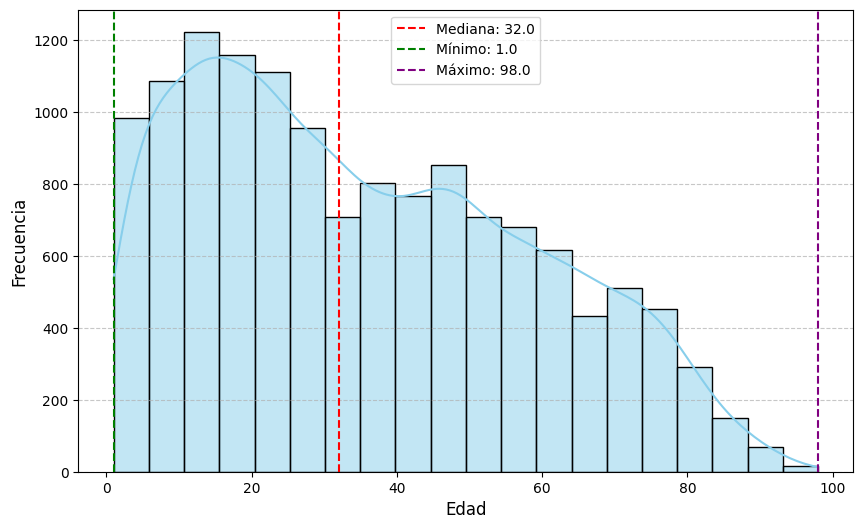

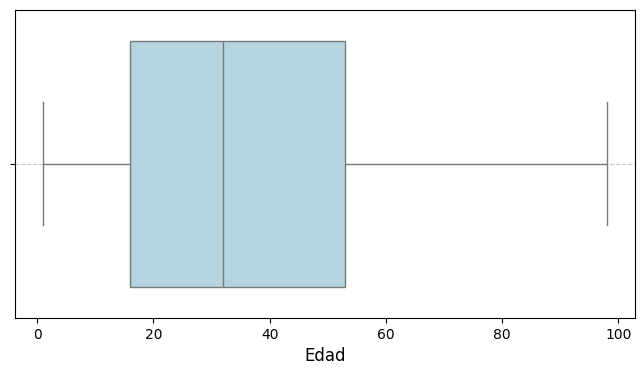

Estadísticas Descriptivas de la Variable CH06 (Edad):
count    13570.000000
mean        35.598674
std         23.051581
min          1.000000
25%         16.000000
50%         32.000000
75%         53.000000
max         98.000000
Name: CH06, dtype: float64
Desviación estándar: 23.051580608926013
Mediana: 32.0
Rango: 1.0 - 98.0


In [24]:
#EJERCICIO 5 ESTADÍSTICAS DESCRIPTIVAS VARIABLES SELECCIONADAS

#VARIABLE EDAD CH06

import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
desc_stats = df_final['CH06'].describe()
std_dev = df_final['CH06'].std()
median = df_final['CH06'].median()
min_age = df_final['CH06'].min()
max_age = df_final['CH06'].max()

# Visualización de la distribución
plt.figure(figsize=(10, 6))

# Histograma con KDE (Kernel Density Estimation)
sns.histplot(df_final['CH06'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.axvline(median, color='red', linestyle='--', label=f'Mediana: {median}')
plt.axvline(min_age, color='green', linestyle='--', label=f'Mínimo: {min_age}')
plt.axvline(max_age, color='purple', linestyle='--', label=f'Máximo: {max_age}')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot para mostrar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_final['CH06'], color='lightblue')
plt.xlabel('Edad', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Impresión de las estadísticas descriptivas
print("Estadísticas Descriptivas de la Variable CH06 (Edad):")
print(desc_stats)
print(f"Desviación estándar: {std_dev}")
print(f"Mediana: {median}")
print(f"Rango: {min_age} - {max_age}")


C:\Users\renzo\AppData\Local\Temp\ipykernel_1488\2065538053.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


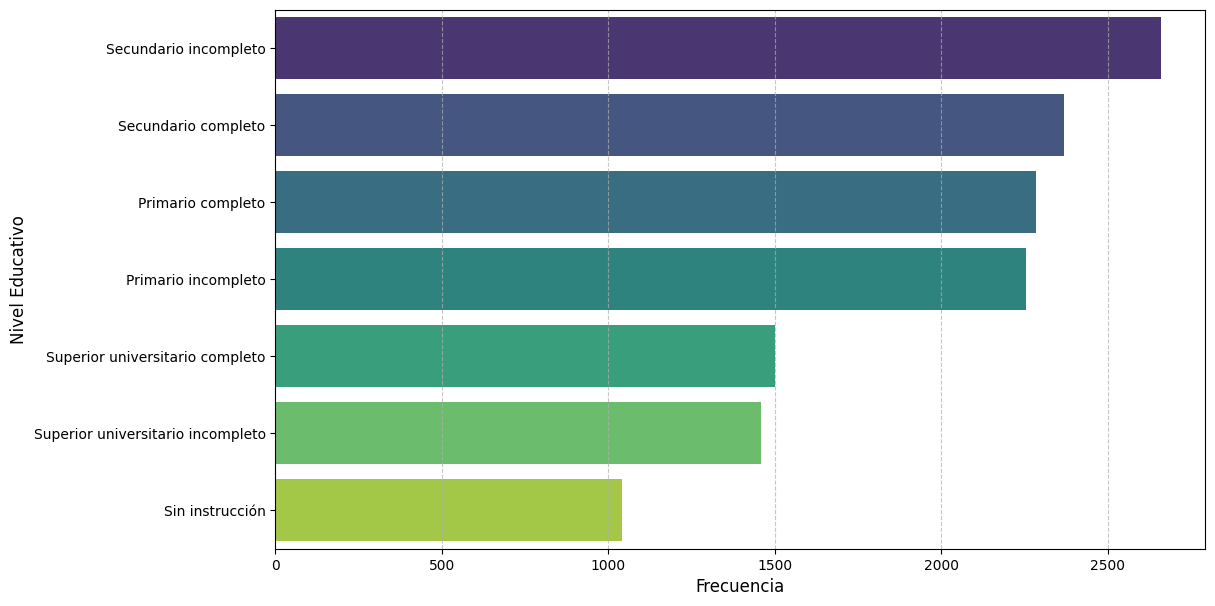

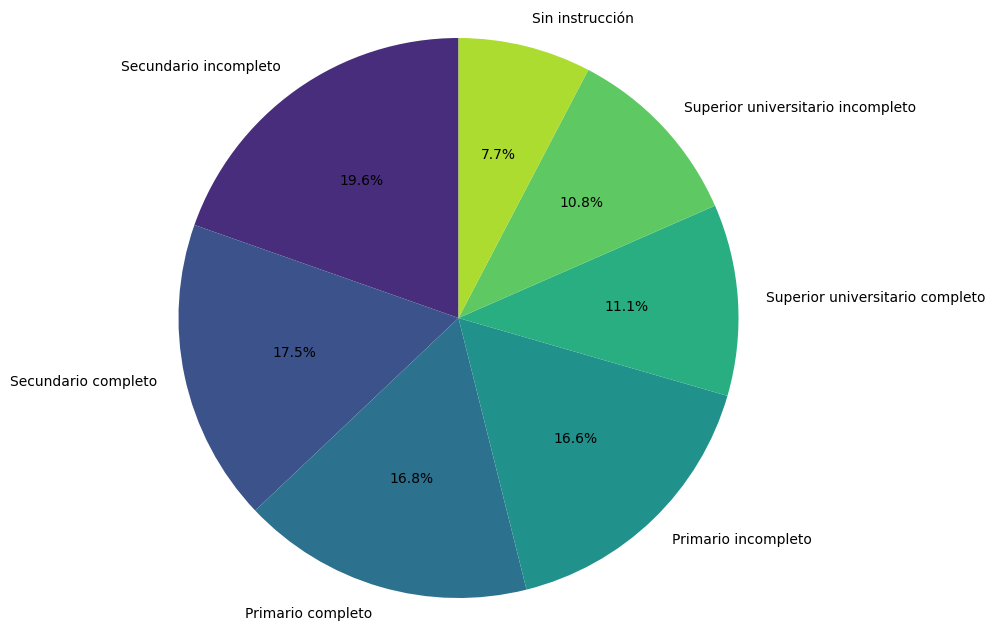

Frecuencia de cada categoría:
NIVEL_ED_LABEL
Secundario incompleto                2661
Secundario completo                  2369
Primario completo                    2285
Primario incompleto                  2254
Superior universitario completo      1500
Superior universitario incompleto    1460
Sin instrucción                      1041
Name: count, dtype: int64

Proporción de cada categoría (en %):
NIVEL_ED_LABEL
Secundario incompleto                19.609433
Secundario completo                  17.457627
Primario completo                    16.838615
Primario incompleto                  16.610169
Superior universitario completo      11.053795
Superior universitario incompleto    10.759027
Sin instrucción                       7.671334
Name: proportion, dtype: float64


In [ ]:
##VARIABLE NIVEL EDUCATIVO NIVEL_ED

import matplotlib.pyplot as plt
import seaborn as sns

# Mapear las categorías con sus descripciones
niveles = {
    1: "Primario incompleto",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario completo",
    5: "Superior universitario incompleto",
    6: "Superior universitario completo",
    7: "Sin instrucción",
    9: "Ns/Nr"
}

# Crear una columna con las etiquetas descriptivas
df_final['NIVEL_ED_LABEL'] = df_final['NIVEL_ED'].map(niveles)

# Frecuencia y proporción de cada categoría
frecuencias = df_final['NIVEL_ED_LABEL'].value_counts()
proporciones = df_final['NIVEL_ED_LABEL'].value_counts(normalize=True) * 100

# Gráfico de barras para frecuencias
plt.figure(figsize=(12, 7))
sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Nivel Educativo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de torta para proporciones
plt.figure(figsize=(10, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(proporciones)))
plt.axis('equal')  # Asegurar que sea circular
plt.show()

# Impresión de las estadísticas
print("Frecuencia de cada categoría:")
print(frecuencias)
print("\nProporción de cada categoría (en %):")
print(proporciones)



C:\Users\renzo\AppData\Local\Temp\ipykernel_1488\1467081073.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='coolwarm')


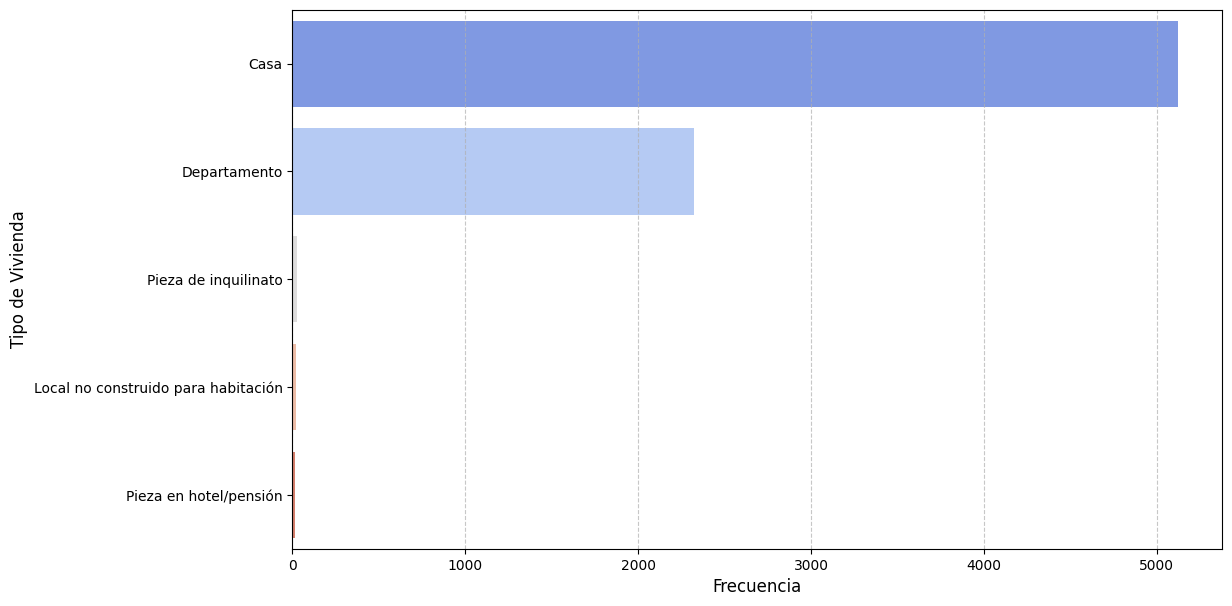

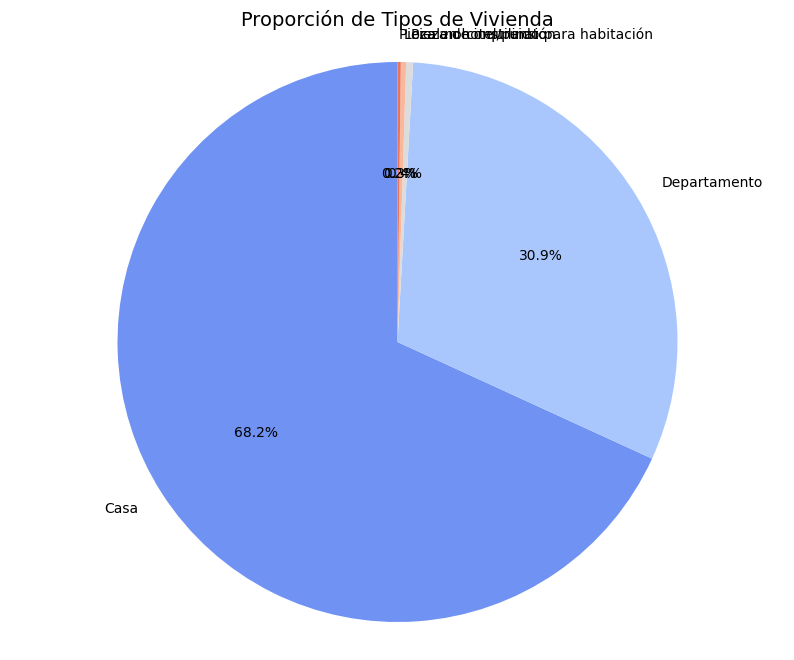

Frecuencia de cada categoría:
IV1_LABEL
Casa                                   5123
Departamento                           2326
Pieza de inquilinato                     30
Local no construido para habitación      23
Pieza en hotel/pensión                   14
Name: count, dtype: int64

Proporción de cada categoría (en %):
IV1_LABEL
Casa                                   68.161256
Departamento                           30.947312
Pieza de inquilinato                    0.399148
Local no construido para habitación     0.306014
Pieza en hotel/pensión                  0.186269
Name: proportion, dtype: float64


In [30]:
#VARIABLE TIPO DE VIVIENDA IV1

# Mapear las categorías con sus descripciones
tipos_vivienda = {
    1: "Casa",
    2: "Departamento",
    3: "Pieza de inquilinato",
    4: "Pieza en hotel/pensión",
    5: "Local no construido para habitación"
}

# Crear una columna con las etiquetas descriptivas
df_final['IV1_LABEL'] = df_final['IV1'].map(tipos_vivienda)

# Frecuencia y proporción de cada categoría
frecuencias = df_final['IV1_LABEL'].value_counts()
proporciones = df_final['IV1_LABEL'].value_counts(normalize=True) * 100

# Gráfico de barras para frecuencias
plt.figure(figsize=(12, 7))
sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='coolwarm')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Vivienda', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de torta para proporciones
plt.figure(figsize=(10, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(proporciones)))
plt.title('Proporción de Tipos de Vivienda', fontsize=14)
plt.axis('equal')  # Asegurar que sea circular
plt.show()

# Impresión de las estadísticas
print("Frecuencia de cada categoría:")
print(frecuencias)
print("\nProporción de cada categoría (en %):")
print(proporciones)
